
# **Add and Remove Noise**


1. How to add white noise or film grain effects to images


### **What is Noise?**


<img src="https://2.bp.blogspot.com/-b-hwrNlSs4Y/V6IKh7NamaI/AAAAAAAAOB4/rJ7oPYVKZgg2Py9eA7pR62Lbn1yNJjnvwCLcB/s1600/ISO-Noise.jpg" width="300" height="200">

ISO is a number that represents how sensitive your camera sensor is to light. The higher the ISO number, the higher your camera's sensitivity, and the less light you need to take a picture. The trade-off is that higher ISOs can lead to degraded image quality and cause your photos to be grainy or 'noisy.

This is because the in low light scenes there isn't much variation between the scene and random photon noise.



In [1]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **Adding Film Grain or Noise to Images**

In [49]:
def add_white_noise(image):
    """Adds white noise to an image by randomly modifying some pixels."""

    noisy_image = image.copy()
    prob = random.uniform(0.01, 0.02)

    # Generate a mask where noise will be applied
    mask = np.random.rand(image.shape[0], image.shape[1]) < prob

    # Apply noise (works for both grayscale and color images)
    noisy_image[mask] = np.random.randint(50, 230)

    return noisy_image

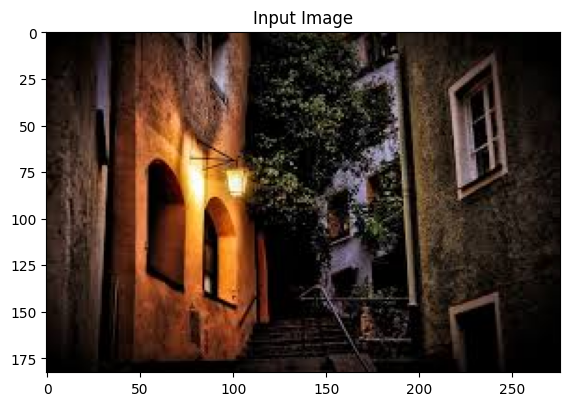

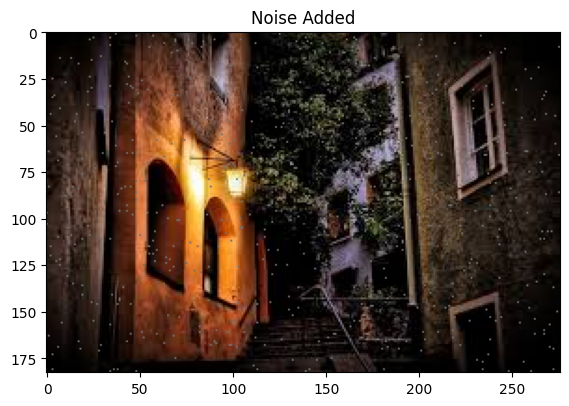

In [50]:
# Load our image
image = cv2.imread('night.jpeg')
imshow("Input Image", image)

# Apply our white noise function to our input image
noise_1 = add_white_noise(image)
imshow("Noise Added", noise_1)

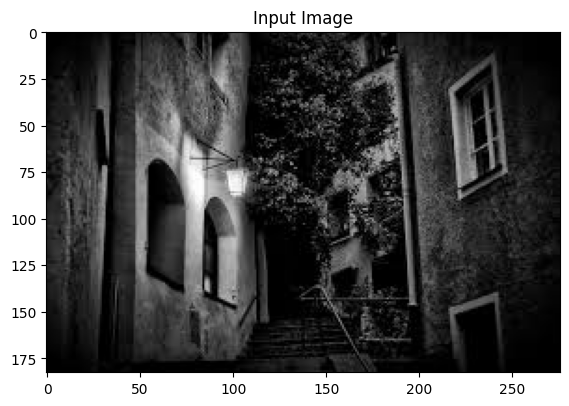

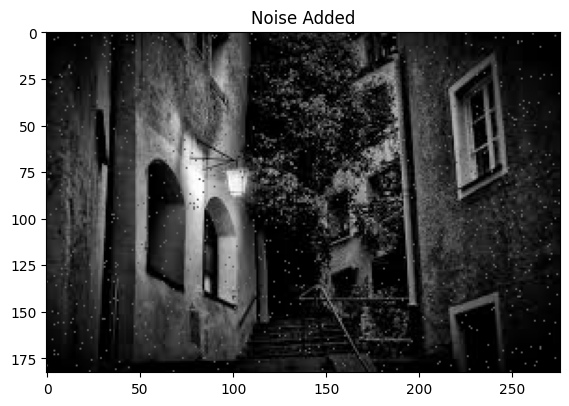

In [51]:
# Load our image
gray = cv2.imread('night.jpeg',0)
imshow("Input Image", gray)

# Apply our white noise function to our input image
noise_2 = add_white_noise(gray)
imshow("Noise Added", noise_2)

Denoising a Grey Scale Image

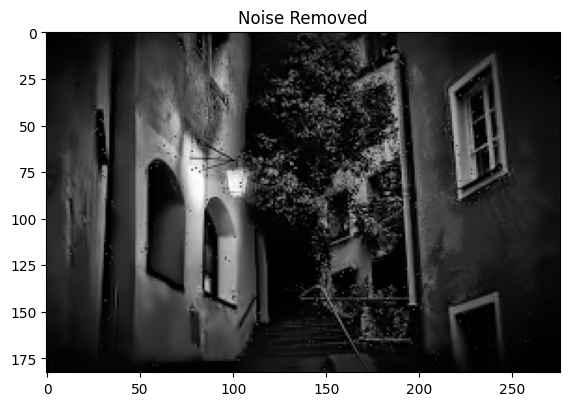

In [45]:
denoised = cv2.fastNlMeansDenoising(noise_2, None, 10, 7, 21)
imshow("Noise Removed", denoised)

Denoising a Colored Image

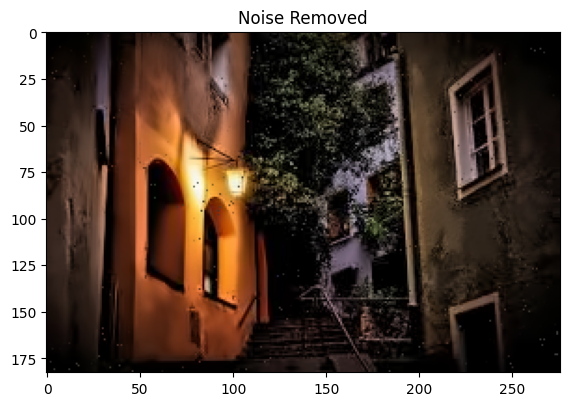

In [20]:
# cv2.fastNlMeansDenoisingColored(input, None, h, hForColorComponents, templateWindowSize, searchWindowSize)
# None - o/p image
# the filter strength 'h' (5-12 is a good range)
# hForColorComponents (filter strength for color channels, usually the same or lower than h
# templateWindowSize (size of the neighborhood patch; must be an odd number, typically 7
# searchWindowSize (defines the area around a pixel to search for similar patches; must be an odd number, typically 21).

dst = cv2.fastNlMeansDenoisingColored(noise_1, None, 11, 6, 7, 21)
imshow("Noise Removed", dst)

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.